In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
master_df = pd.merge(city_df, ride_df, on="city")

# Display the data table for preview
master_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
fare_per_city = master_df.groupby("city")["fare"].mean()
rides_per_city = master_df.groupby("city")["ride_id"].count()
drivers_per_city = master_df.groupby("city")["driver_count"].mean()
city_type = city_df.set_index("city")["type"]

plot_df = pd.DataFrame({"Average Fare": fare_per_city,
                        "Total Rides": rides_per_city,
                        "Total Drivers": drivers_per_city,
                        "City Type": city_type})
plot_df.head()

,Average Fare,Total Rides,Total Drivers,City Type
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


## Bubble Plot of Ride Sharing Data

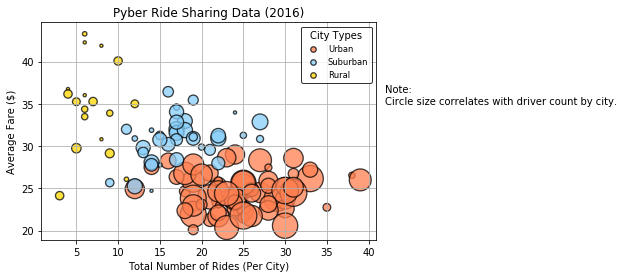

In [5]:
# Obtain the x and y coordinates for each of the three city types

urban_cities = plot_df.loc[plot_df["City Type"] == "Urban"]
suburban_cities = plot_df.loc[plot_df["City Type"] == "Suburban"]
rural_cities = plot_df.loc[plot_df["City Type"] == "Rural"]

# Build the scatter plots for each city types

plt.scatter(urban_cities["Total Rides"], urban_cities["Average Fare"], c = "coral", edgecolors = "black", 
            s = urban_cities["Total Drivers"]*10, label = "Urban", alpha = .75, linewidth = 1.3)
plt.scatter(suburban_cities["Total Rides"], suburban_cities["Average Fare"], c = "lightskyblue", edgecolors = "black", 
            s = suburban_cities["Total Drivers"]*10, label = "Suburban", alpha = .75, linewidth = 1.3)
plt.scatter(rural_cities["Total Rides"], rural_cities["Average Fare"], c = "gold", edgecolors = "black", 
            s = rural_cities["Total Drivers"]*10, label = "Rural", alpha = .75, linewidth = 1.3)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend

legend = plt.legend(edgecolor = "black", frameon = True, title = "City Types", fontsize = "small")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size

plt.text(42, 35, "Note:\nCircle size correlates with driver count by city.")

# Save Figure

plt.show()

## Total Fares by City Type

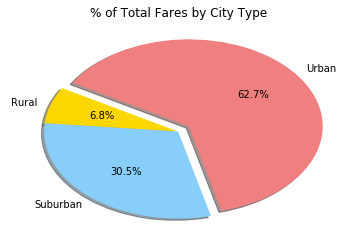

In [6]:
# Calculate Type Percents

city_type_total_fare = master_df.groupby("type")["fare"].sum()

# Build Pie Chart

colors = ["gold", "lightskyblue", "lightcoral"]
city_types = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
plt.pie(city_type_total_fare, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure

plt.show()

## Total Rides by City Type

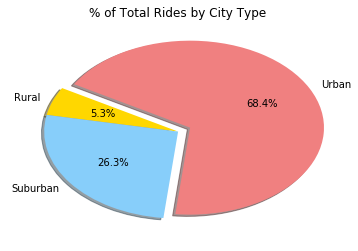

In [7]:
# Calculate Ride Percents

city_type_total_rides = master_df.groupby("type")["ride_id"].count()

# Build Pie Chart

plt.pie(city_type_total_rides, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure

plt.show()

## Total Drivers by City Type

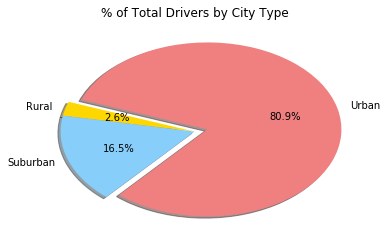

In [9]:
# Calculate Driver Percents

city_type_total_drivers = plot_df.groupby("City Type")["Total Drivers"].sum()

# Build Pie Charts

plt.pie(city_type_total_drivers, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")

# Save Figure

plt.show()